https://arxiv.org/pdf/1608.04667.pdf

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
from keras.preprocessing import image

In [3]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d paultimothymooney/kermany2018


import zipfile
zipref=zipfile.ZipFile("/content/kermany2018.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/kermany2018.zip

100% 10.8G/10.8G [04:30<00:00, 46.6MB/s]
100% 10.8G/10.8G [04:30<00:00, 43.0MB/s]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import math
from sklearn import mixture
from sklearn.utils import shuffle
from skimage import measure
from glob import glob
import os

TRAIN_DATA = "/content/OCT2017 /train/NORMAL"

types = ['Type_1']#,'Type_2','Type_3']
type_ids = []

for type in enumerate(types):
    type_i_files = glob(os.path.join(TRAIN_DATA, "*.jpeg"))
    type_i_ids = np.array([s[len(TRAIN_DATA)+8:-4] for s in type_i_files])
    type_ids.append(type_i_ids[:5])

def get_filename():
    """
    Method to get image file path from its id and type   
    """
    img = glob(os.path.join(TRAIN_DATA, "*.jpeg"))

    ext = 'jpeg'
    return img

def get_image_data():
    """
    Method to get image data as np.array specifying image id and type
    """
    fname = get_filename()
    img = cv2.imread(fname)
    assert img is not None, "Failed to read image : %s, %s" 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
import glob
cv_img = []
for img in glob.glob("/content/OCT2017 /train/NORMAL/*.jpeg"):
    n= cv2.imread(img)
    cv_img.append(n)

KeyboardInterrupt: ignored

In [ ]:
img = cv2.imread('/content/OCT2017 /train/NORMAL/NORMAL-1004480-1.jpeg')

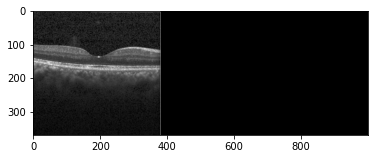

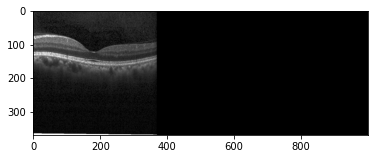

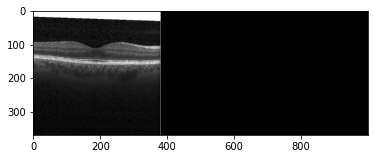

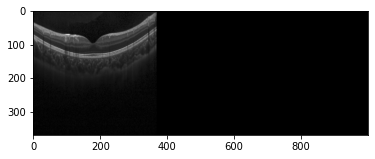

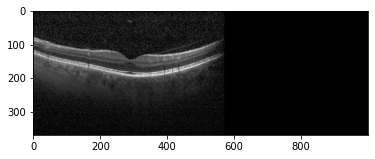

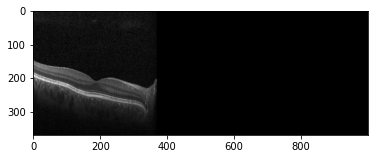

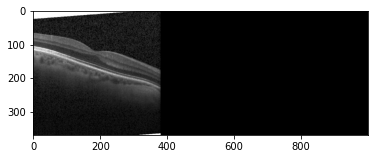

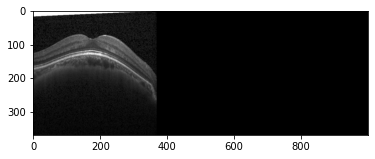

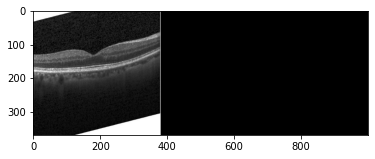

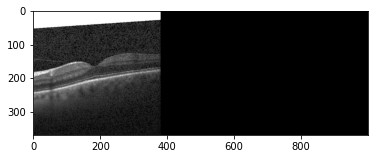

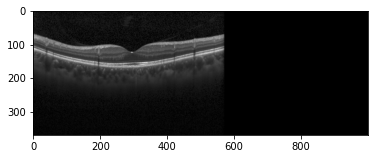

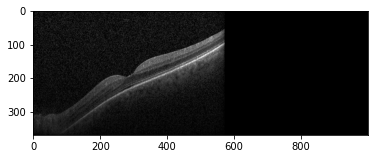

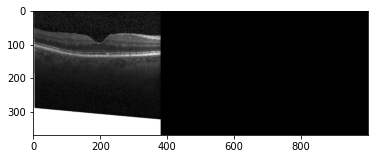

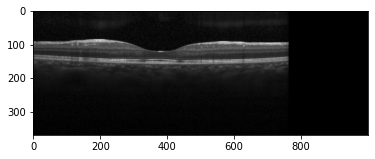

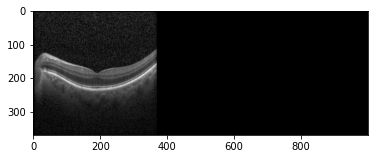

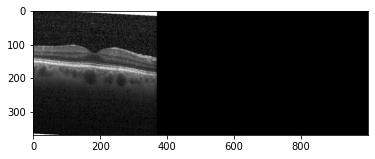

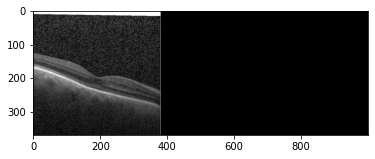

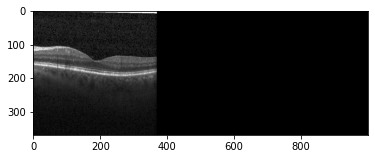

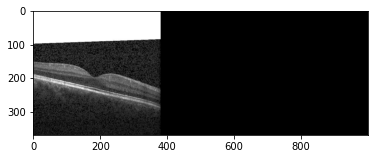

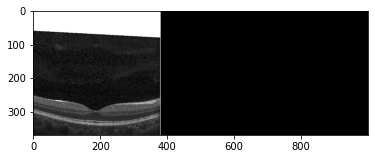

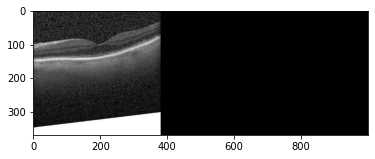

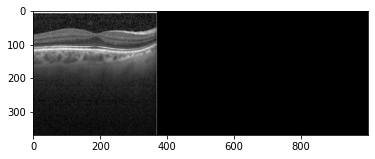

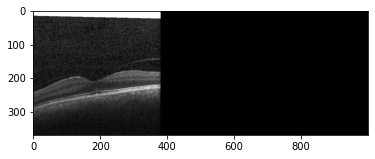

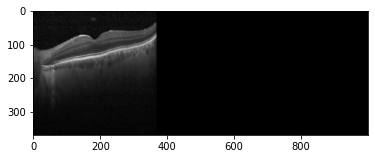

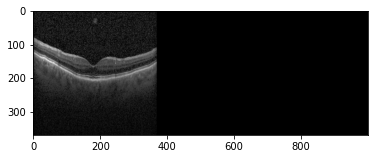

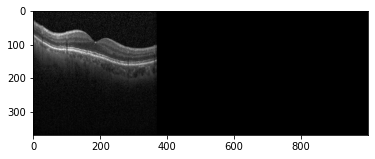

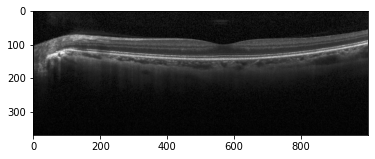

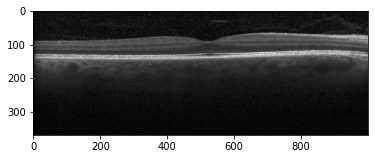

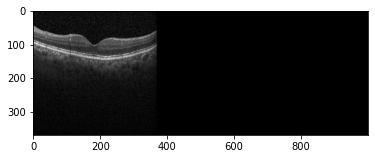

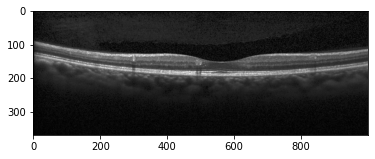

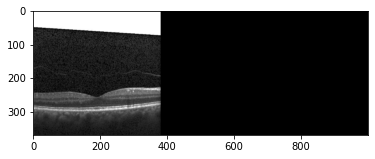

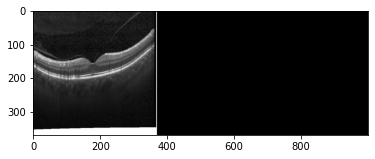

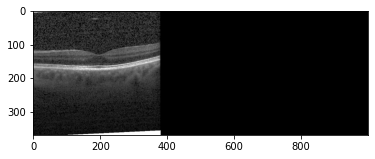

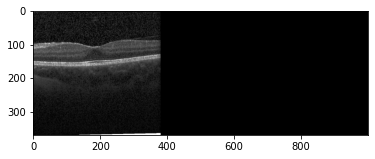

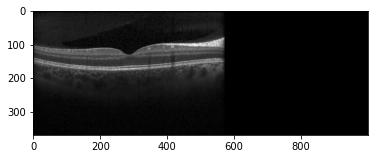

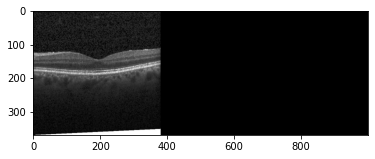

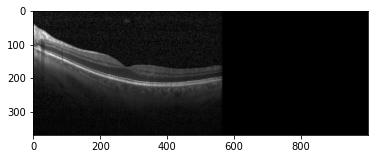

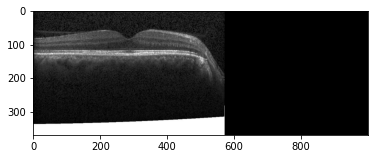

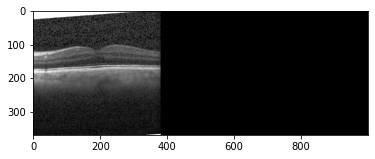

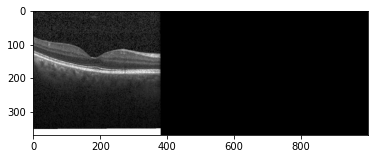

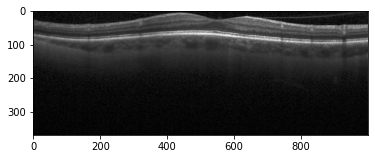

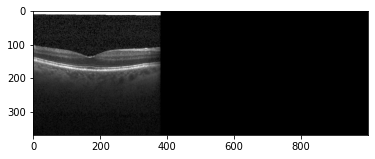

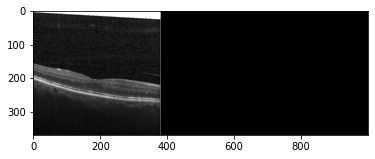

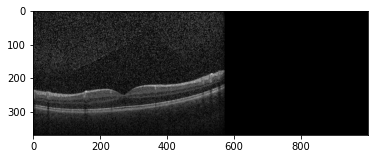

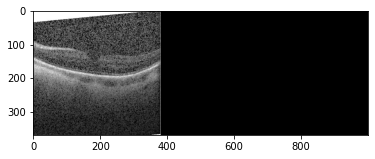

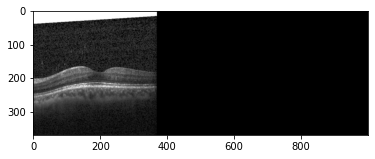

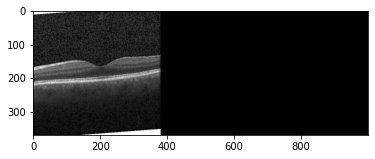

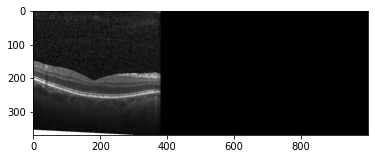

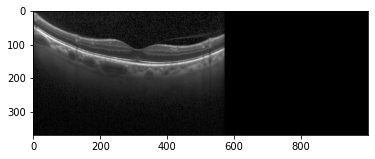

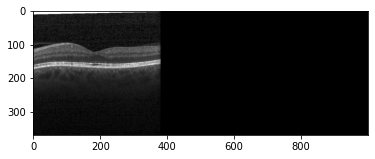

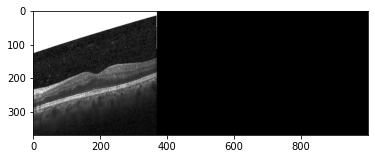

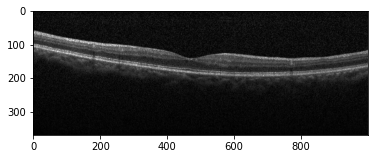

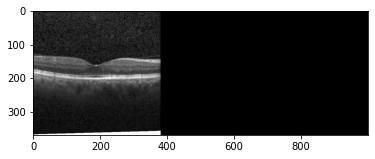

KeyboardInterrupt: ignored

In [ ]:
from PIL import Image
import numpy as np
reshaped_color = []

for img in glob.glob("/content/OCT2017 /train/NORMAL/*.jpeg"):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ar = img.shape[0] * 1.0 / 370
    new_img = cv2.resize(img, (int(img.shape[1] / ar), 370))
    new_img = new_img[:, :360, :]
    x = np.zeros((370, 360, 3), dtype=np.uint8)
    x[:new_img.shape[0], :new_img.shape[1], :] = new_img
    reshaped_color.append(x)
    plt.imshow(x)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import random

In [ ]:
labels = os.listdir('/content/OCT2017 /train')
IMG_SIZE = 224
batch_size = 16
train_data_dir = '/content/OCT2017 /train'
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=16,
    class_mode='categorical')

Found 83484 images belonging to 4 classes.


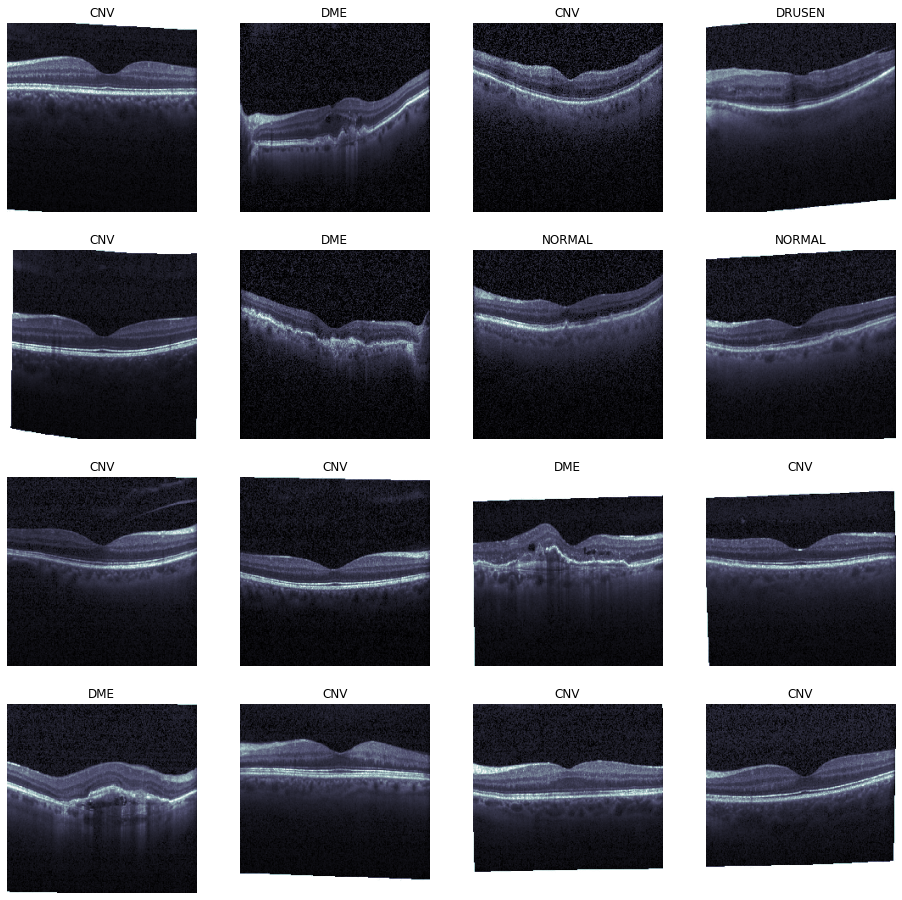

In [ ]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

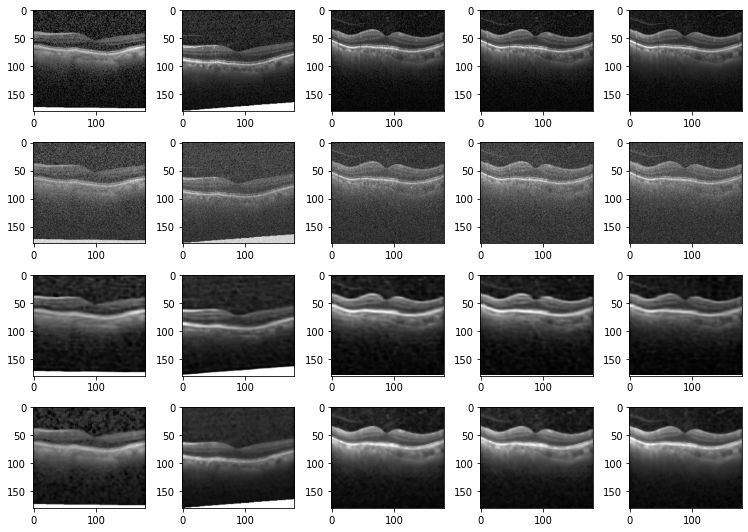

In [ ]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (180,180)), aspect='auto', cmap='gray') # Original image
        ax[1][i].imshow(np.reshape(y_true[i], (180,180)), aspect='auto', cmap='gray') # Noise Image
        ax[2][i].imshow(np.reshape(y_pred[i], (180,180)), aspect='auto', cmap='gray') # Denoised Image
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray') # Median Filter Image
       
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])